**import packages**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
import pickle



**Ignore warning**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Read dataset**

In [ ]:
df=pd.read_csv('/content/creditcard_new.csv')
df

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,NaN,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25123,5150482,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25124,5150483,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25125,5150484,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,13,1
25126,5150485,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,2,1


**Check if there any null values exists**

In [ ]:
df.isna().sum()

,0
Applicant_ID,0
Applicant_Gender,3
Owned_Car,0
Owned_Realty,0
Total_Children,0
Total_Income,0
Income_Type,0
Education_Type,0
Family_Status,0
Housing_Type,0


**Drop Ind_ID & Type_Occupation**

In [ ]:
df.drop(['Applicant_ID','Owned_Phone'],axis=1,inplace=True)

**Fill the missing values**

In [ ]:
df['Applicant_Gender']=df['Applicant_Gender'].fillna(df['Applicant_Gender'].mode()[0])

In [ ]:
df.isna().sum()

,0
Applicant_Gender,0
Owned_Car,0
Owned_Realty,0
Total_Children,0
Total_Income,0
Income_Type,0
Education_Type,0
Family_Status,0
Housing_Type,0
Owned_Mobile_Phone,0


**Check all the features are in numeric**

In [ ]:
df.dtypes

,0
Applicant_Gender,object
Owned_Car,int64
Owned_Realty,int64
Total_Children,int64
Total_Income,int64
Income_Type,object
Education_Type,object
Family_Status,object
Housing_Type,object
Owned_Mobile_Phone,int64


**convert object to numeric**

In [ ]:
cols=['Applicant_Gender','Income_Type','Education_Type','Family_Status','Housing_Type','Job_Title']
encoder=LabelEncoder()
for col in cols:
  encoder.fit(df[col])
  print(encoder.classes_)
  df[col]=encoder.transform(df[col])

['  ' 'F      ' 'M      ']
['Commercial associate                              '
 'Pensioner                                         '
 'State servant                                     '
 'Student                                           '
 'Working                                           ']
['Academic degree                                   '
 'Higher education                                  '
 'Incomplete higher                                 '
 'Lower secondary                                   '
 'Secondary / secondary special                     ']
['Civil marriage                                    '
 'Married                                           '
 'Separated                                         '
 'Single / not married                              '
 'Widow                                             ']
['Co-op apartment                                   '
 'House / apartment                                 '
 'Municipal apartment                               

In [ ]:
df.dtypes

,0
Applicant_Gender,int64
Owned_Car,int64
Owned_Realty,int64
Total_Children,int64
Total_Income,int64
Income_Type,int64
Education_Type,int64
Family_Status,int64
Housing_Type,int64
Owned_Mobile_Phone,int64


**Split into features and target**

In [ ]:
X=df.iloc[:,:-1]
X

,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
0,2,1,1,0,112500,4,4,1,1,1,0,0,16,2,59,4,0,30
1,1,0,1,0,270000,0,4,3,1,1,0,1,14,1,53,9,0,5
2,1,0,1,0,270000,0,4,3,1,1,0,1,14,1,53,9,0,5
3,1,0,1,0,270000,0,4,3,1,1,0,1,14,1,53,9,0,27
4,1,0,1,0,270000,0,4,3,1,1,0,1,14,1,53,9,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25123,1,1,1,1,157500,4,4,1,1,1,0,0,3,3,30,5,0,18
25124,1,1,1,1,157500,4,4,1,1,1,0,0,3,3,30,5,0,18
25125,1,1,1,1,157500,4,4,1,1,1,0,0,3,3,30,5,0,13
25126,1,1,1,1,157500,4,4,1,1,1,0,0,3,3,30,5,0,2


In [ ]:
y=df.iloc[:,-1]
y

,Status
0,1
1,1
2,1
3,1
4,1
...,...
25123,1
25124,1
25125,1
25126,1


**Data visualization**

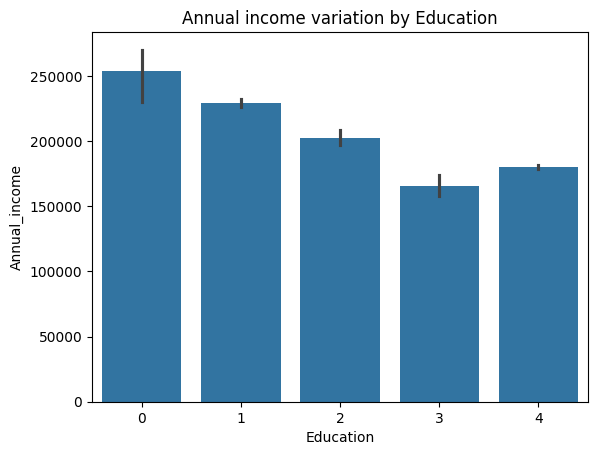

In [ ]:
sns.barplot(x='Education_Type',y='Total_Income',data=df)
plt.title("Annual income variation by Education")
plt.xlabel("Education")
plt.ylabel("Annual_income")
plt.show()

In [ ]:
#The bars are similar in height, then education might not be the strongest income predictor.


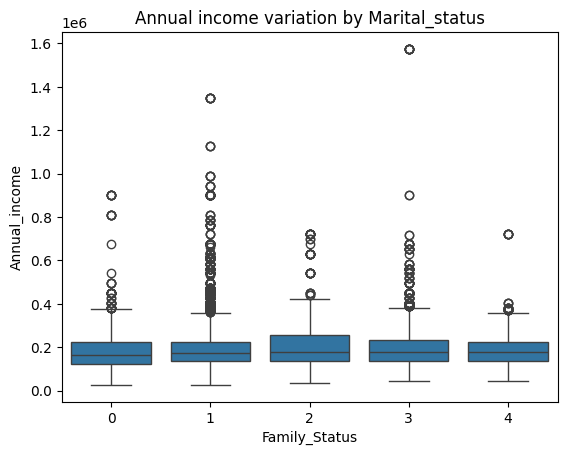

In [ ]:
sns.boxplot(x='Family_Status',y='Total_Income',data=df)
plt.title("Annual income variation by Marital_status")
plt.xlabel("Family_Status")
plt.ylabel("Annual_income")
plt.show()

In [ ]:
#Any dots above or below the whiskers indicate outliers—possibly high-earning individuals or very low-income individuals
#the box for married individuals is taller, it means there is a wider spread in income (i.e., high earners and low earners exist in this group)
# a group has a shorter box, income is more concentrated.

<Axes: >

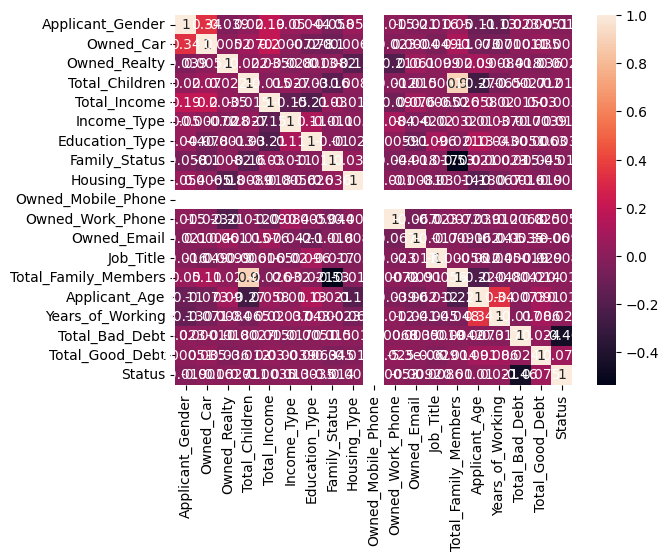

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#Car_Owner vs. Propert_Owner → If a person owns a car, they are also more likely to own property.
#Work_Phone vs. Phone → If someone has a work phone, they are likely to have another registered phone
#EMAIL_ID vs. Annual_income → Having an email ID does not influence income
#Type_Occupation vs. Housing_type → Job type does not strongly predict housing type.

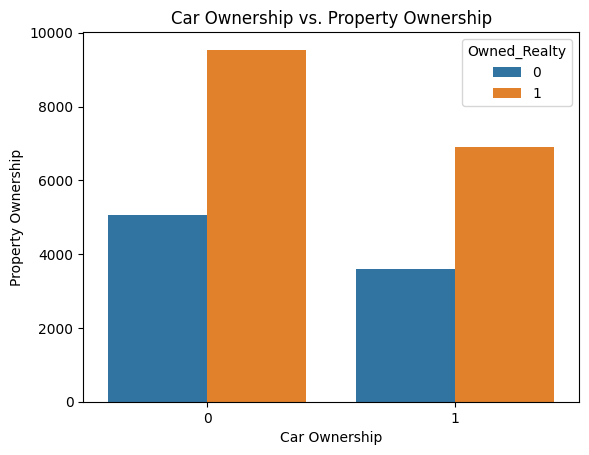

In [ ]:
sns.countplot(x='Owned_Car', hue='Owned_Realty', data=df)
plt.title("Car Ownership vs. Property Ownership")
plt.xlabel("Car Ownership")
plt.ylabel("Property Ownership")
plt.show()

In [ ]:
#people who own cars are likely to own property.
#The plot will display how many people own both a car and property (Car_Owner = 1 and Propert_Owner = 1), how many own only a car, and how many own only property.

**scale features**

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[1.        , 1.        , 1.        , ..., 0.06976744, 0.        ,
        0.48333333],
       [0.5       , 0.        , 1.        , ..., 0.18604651, 0.        ,
        0.06666667],
       [0.5       , 0.        , 1.        , ..., 0.18604651, 0.        ,
        0.06666667],
       ...,
       [0.5       , 1.        , 1.        , ..., 0.09302326, 0.        ,
        0.2       ],
       [0.5       , 1.        , 1.        , ..., 0.09302326, 0.        ,
        0.01666667],
       [1.        , 1.        , 0.        , ..., 0.11627907, 0.        ,
        0.48333333]])

**split features and target for training and testing**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

**Model creation and test performnace**

************ KNeighborsClassifier(n_neighbors=3) ************
              precision    recall  f1-score   support

           0       0.71      0.15      0.24        34
           1       1.00      1.00      1.00      7505

    accuracy                           1.00      7539
   macro avg       0.86      0.57      0.62      7539
weighted avg       0.99      1.00      0.99      7539


************ SVC() ************
              precision    recall  f1-score   support

           0       1.00      0.06      0.11        34
           1       1.00      1.00      1.00      7505

    accuracy                           1.00      7539
   macro avg       1.00      0.53      0.55      7539
weighted avg       1.00      1.00      0.99      7539


************ GaussianNB() ************
              precision    recall  f1-score   support

           0       0.27      0.65      0.38        34
           1       1.00      0.99      1.00      7505

    accuracy                           0.99    

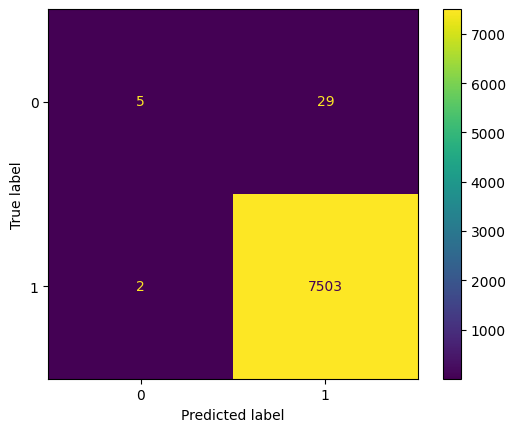

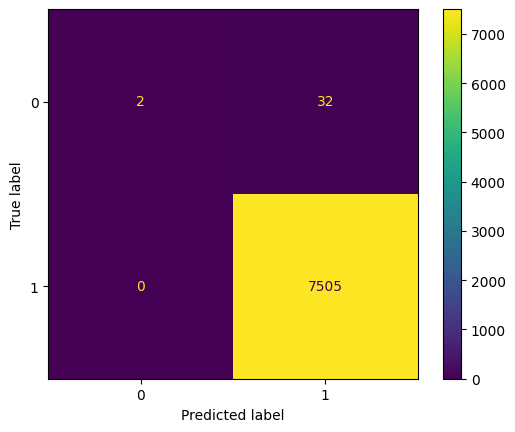

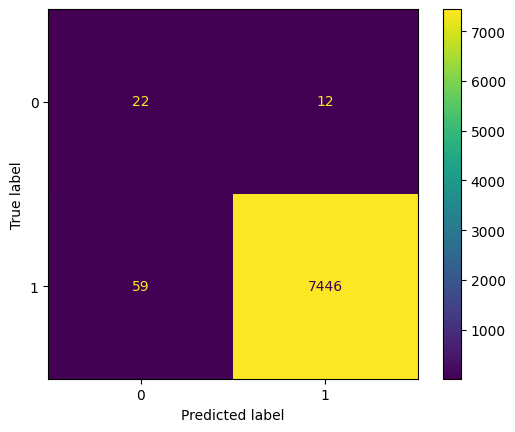

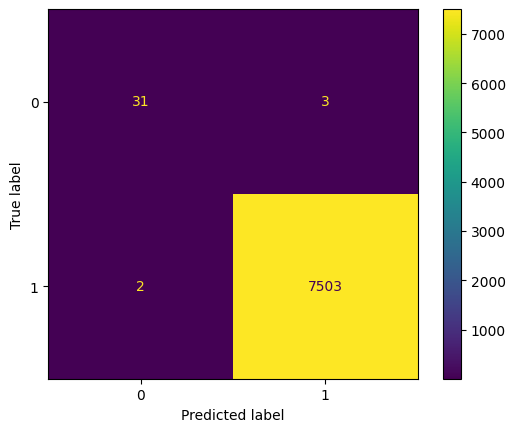

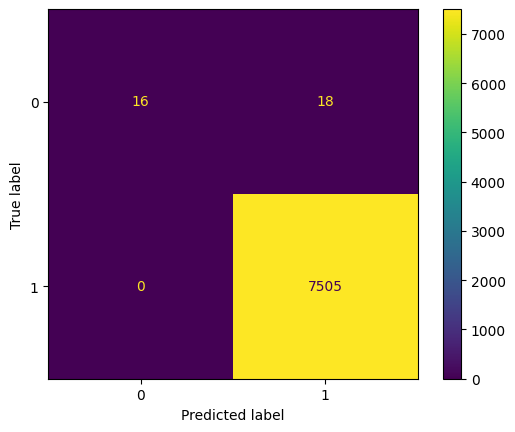

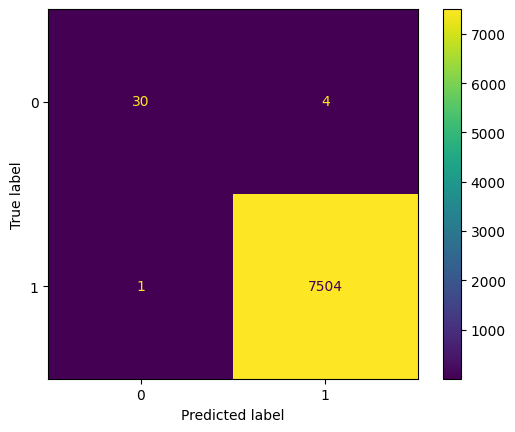

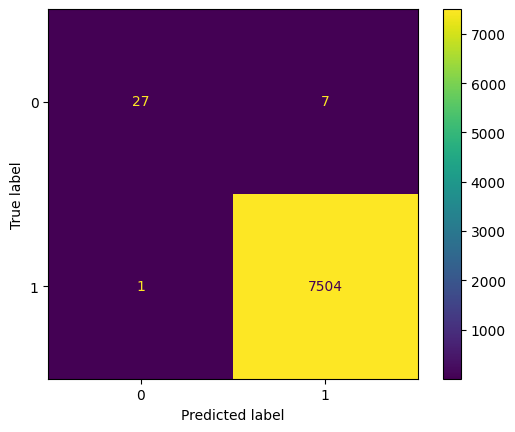

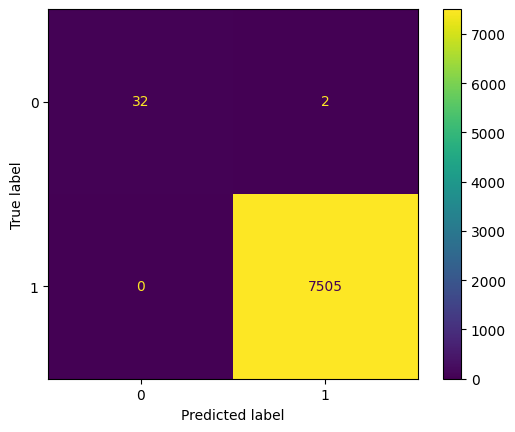

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
sv=SVC(kernel='rbf')
nb=GaussianNB()
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
rf=RandomForestClassifier(criterion='entropy',random_state=1)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xgb=XGBClassifier()
models=[knn,sv,nb,dt,rf,ab,gb,xgb]
for model in models:
  print("************",model,"************")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print()

**oversampling**

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X_scaled,y)

In [ ]:
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

************ KNeighborsClassifier(n_neighbors=3) ************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7374
           1       1.00      0.99      1.00      7631

    accuracy                           1.00     15005
   macro avg       1.00      1.00      1.00     15005
weighted avg       1.00      1.00      1.00     15005


************ SVC() ************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7374
           1       1.00      0.99      1.00      7631

    accuracy                           1.00     15005
   macro avg       1.00      1.00      1.00     15005
weighted avg       1.00      1.00      1.00     15005


************ GaussianNB() ************
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7374
           1       0.98      0.90      0.94      7631

    accuracy                           0.94    

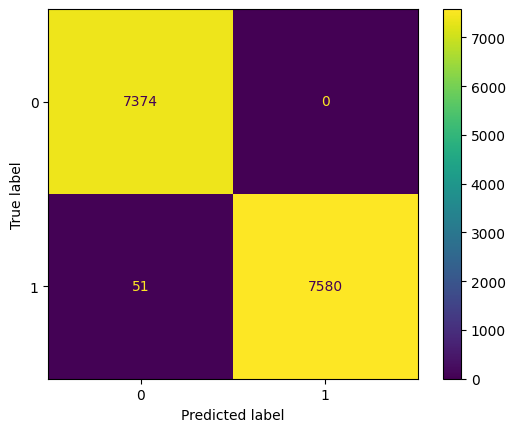

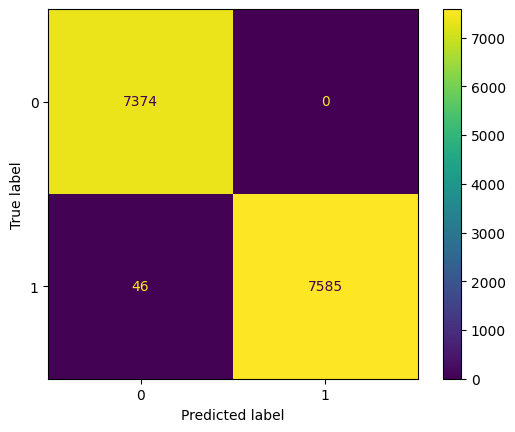

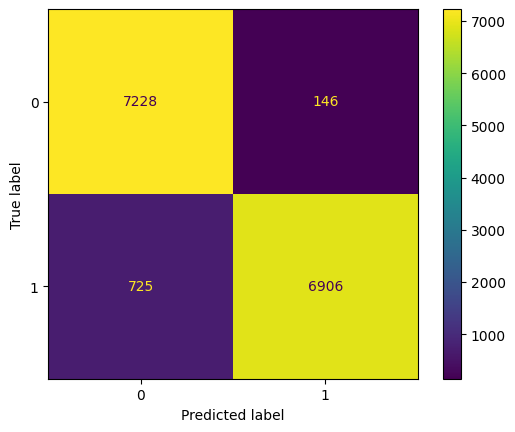

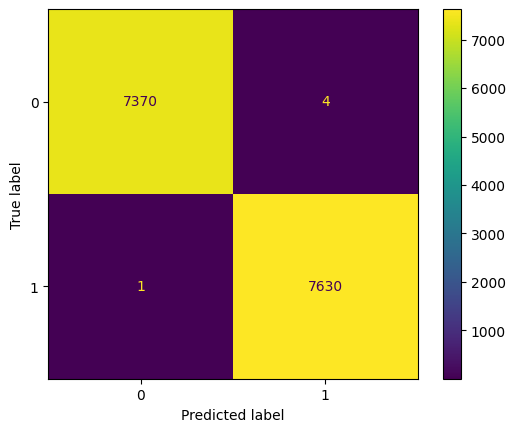

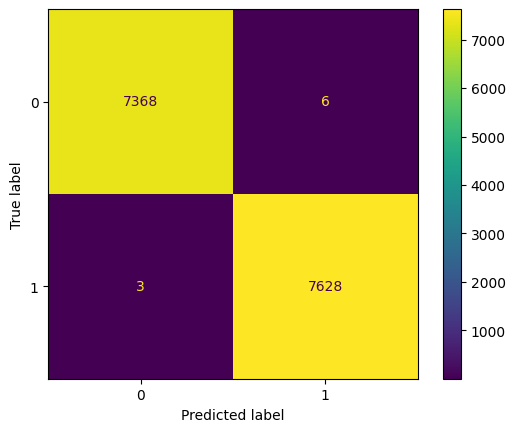

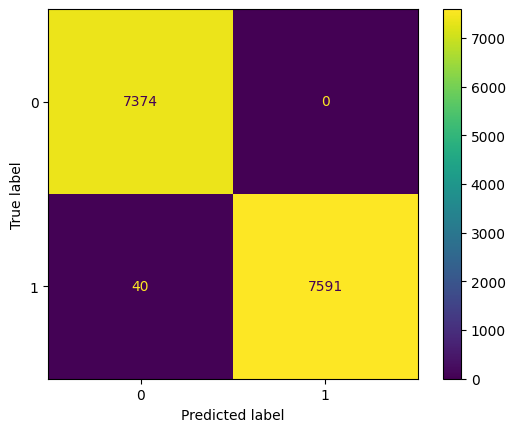

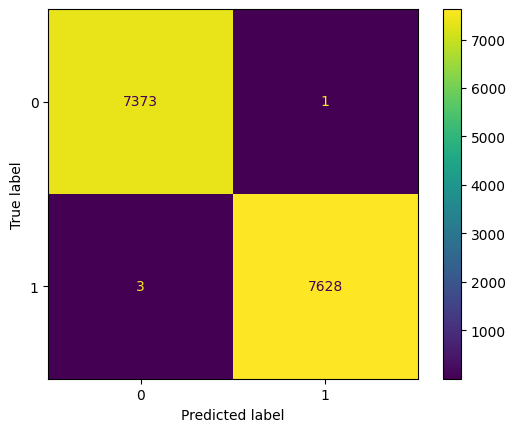

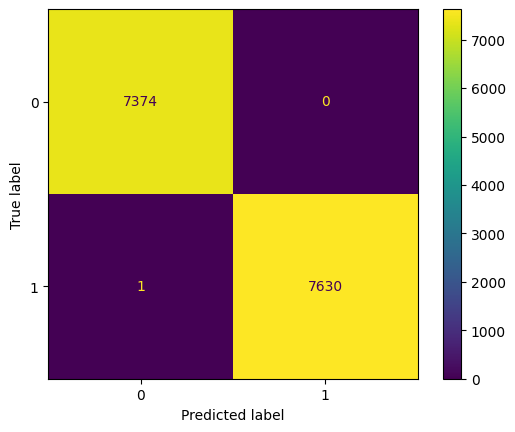

In [ ]:
knn_os=KNeighborsClassifier(n_neighbors=3)
sv_os=SVC(kernel='rbf')
nb_os=GaussianNB()
dt_os=DecisionTreeClassifier(criterion='entropy',random_state=1)
rf_os=RandomForestClassifier(criterion='entropy',random_state=1)
ab_os=AdaBoostClassifier(random_state=1)
gb_os=GradientBoostingClassifier(random_state=1)
xgb_os=XGBClassifier()
models=[knn_os,sv_os,nb_os,dt_os,rf_os,ab_os,gb_os,xgb_os]
for model in models:
  print("************",model,"************")
  model.fit(X_os_train,y_os_train)
  y_pred=model.predict(X_os_test)
  print(classification_report(y_os_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_pred))
  print()

**ROC curve**

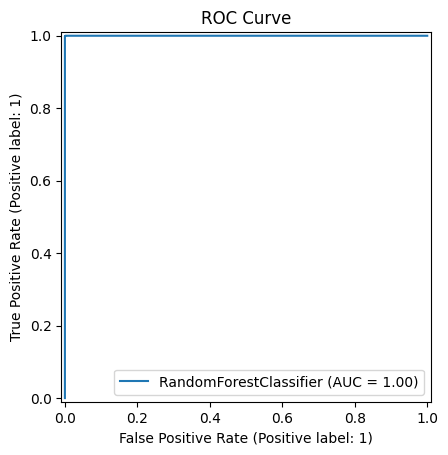

In [ ]:
RocCurveDisplay.from_estimator(rf_os, X_os_test, y_os_test)
plt.title('ROC Curve')
plt.show()

In [ ]:
#The ROC Curve shows how well the model distinguishes between approved (1) and rejected (0) applications.
#A good model has a curve that bows towards the top-left corner.

**Features selection**

In [ ]:
df.corr()

,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
Applicant_Gender,1.000000,0.340562,-0.038579,0.019795,0.192172,0.050022,0.043734,-0.058429,0.053762,NaN,0.015062,-0.021353,-0.015789,0.050017,-0.108618,-0.127220,0.022968,0.000515,-0.019279
Owned_Car,0.340562,1.000000,0.005219,0.069889,0.197574,-0.000715,-0.077618,-0.100905,0.006524,NaN,-0.022982,0.000403,-0.049131,0.114689,-0.072661,-0.071300,0.000112,0.035407,-0.001604
Owned_Realty,-0.038579,0.005219,1.000000,0.021575,0.034507,-0.028447,-0.001255,0.008190,-0.175401,NaN,-0.209380,0.061213,0.009923,0.019551,0.090323,0.008389,-0.018068,-0.035979,0.002716
Total_Children,0.019795,0.069889,0.021575,1.000000,-0.015182,0.027394,-0.030444,-0.164346,0.008866,NaN,-0.011658,-0.014728,-0.006053,0.898460,-0.265141,-0.065068,-0.002668,-0.011748,0.011036
Total_Income,0.192172,0.197574,0.034507,-0.015182,1.000000,-0.154172,-0.211524,0.029559,-0.018484,NaN,-0.090286,0.076031,0.006546,-0.026003,0.057930,0.019723,0.015181,0.030039,-0.003482
Income_Type,0.050022,-0.000715,-0.028447,0.027394,-0.154172,1.000000,0.114358,-0.010775,-0.005557,NaN,0.084496,-0.041780,-0.019825,0.031948,0.010484,0.037485,-0.016819,-0.003903,0.013117
Education_Type,0.043734,-0.077618,-0.001255,-0.030444,-0.211524,0.114358,1.000000,-0.010394,-0.025822,NaN,0.005949,-0.101003,0.096348,-0.020624,0.132624,0.043055,-0.005146,-0.006268,0.003486
Family_Status,-0.058429,-0.100905,0.008190,-0.164346,0.029559,-0.010775,-0.010394,1.000000,0.035600,NaN,-0.044223,-0.017660,-0.016619,-0.533812,0.021138,0.000230,0.014892,-0.045231,-0.013942
Housing_Type,0.053762,0.006524,-0.175401,0.008866,-0.018484,-0.005557,-0.025822,0.035600,1.000000,NaN,0.001047,-0.008069,-0.030286,-0.013531,-0.183300,-0.067236,0.001561,-0.019091,-0.001707
Owned_Mobile_Phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X=X.drop(['Owned_Mobile_Phone','Owned_Work_Phone','Total_Bad_Debt'],axis=1)
X

,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Good_Debt
0,2,1,1,0,112500,4,4,1,1,0,16,2,59,4,30
1,1,0,1,0,270000,0,4,3,1,1,14,1,53,9,5
2,1,0,1,0,270000,0,4,3,1,1,14,1,53,9,5
3,1,0,1,0,270000,0,4,3,1,1,14,1,53,9,27
4,1,0,1,0,270000,0,4,3,1,1,14,1,53,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25123,1,1,1,1,157500,4,4,1,1,0,3,3,30,5,18
25124,1,1,1,1,157500,4,4,1,1,0,3,3,30,5,18
25125,1,1,1,1,157500,4,4,1,1,0,3,3,30,5,13
25126,1,1,1,1,157500,4,4,1,1,0,3,3,30,5,2


In [ ]:
X_scaled=scaler.fit_transform(X)
X_scaled

array([[1.        , 1.        , 1.        , ..., 0.80851064, 0.06976744,
        0.48333333],
       [0.5       , 0.        , 1.        , ..., 0.68085106, 0.18604651,
        0.06666667],
       [0.5       , 0.        , 1.        , ..., 0.68085106, 0.18604651,
        0.06666667],
       ...,
       [0.5       , 1.        , 1.        , ..., 0.19148936, 0.09302326,
        0.2       ],
       [0.5       , 1.        , 1.        , ..., 0.19148936, 0.09302326,
        0.01666667],
       [1.        , 1.        , 0.        , ..., 0.70212766, 0.11627907,
        0.48333333]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

************ KNeighborsClassifier(n_neighbors=3) ************
              precision    recall  f1-score   support

           0       0.44      0.12      0.19        34
           1       1.00      1.00      1.00      7505

    accuracy                           1.00      7539
   macro avg       0.72      0.56      0.59      7539
weighted avg       0.99      1.00      0.99      7539


************ SVC() ************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       1.00      1.00      1.00      7505

    accuracy                           1.00      7539
   macro avg       0.50      0.50      0.50      7539
weighted avg       0.99      1.00      0.99      7539


************ GaussianNB() ************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       1.00      1.00      1.00      7505

    accuracy                           0.99    

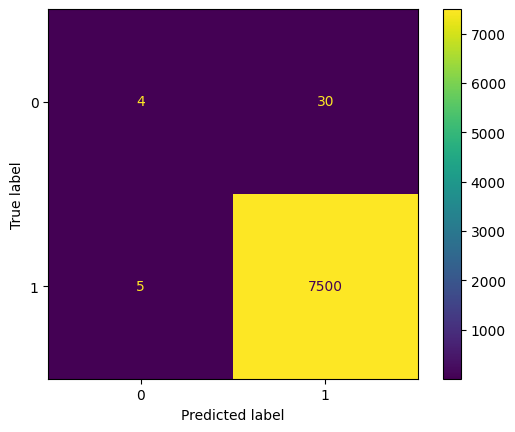

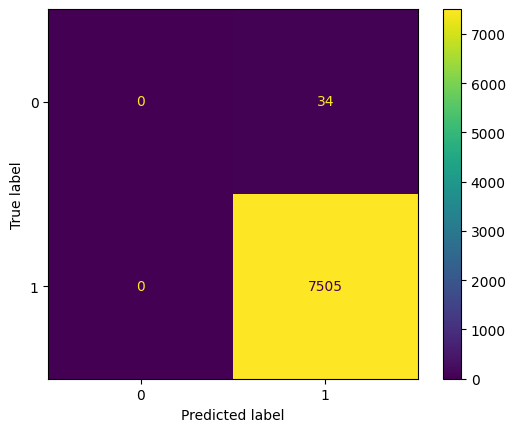

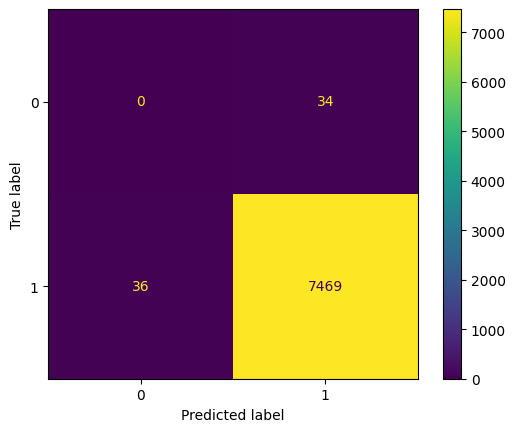

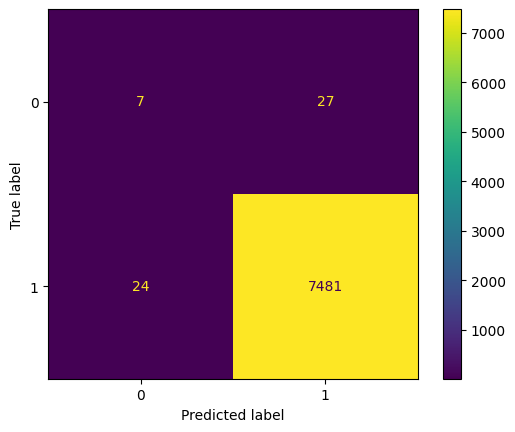

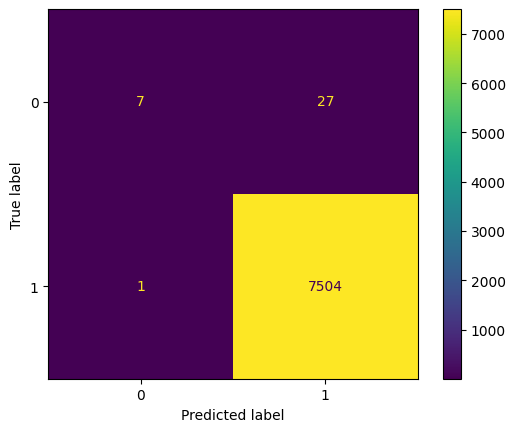

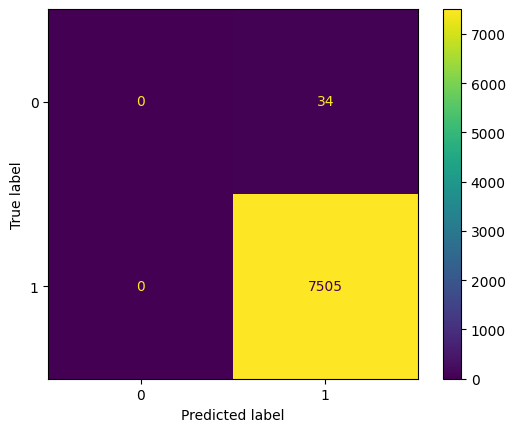

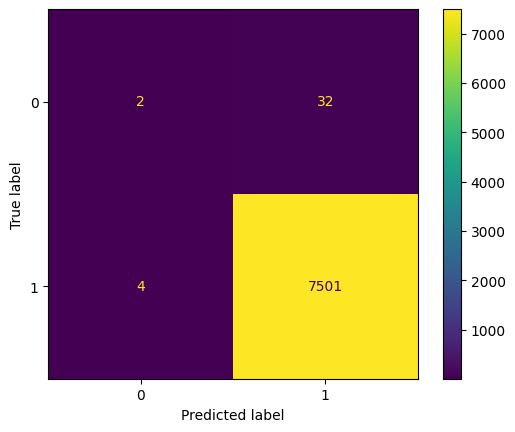

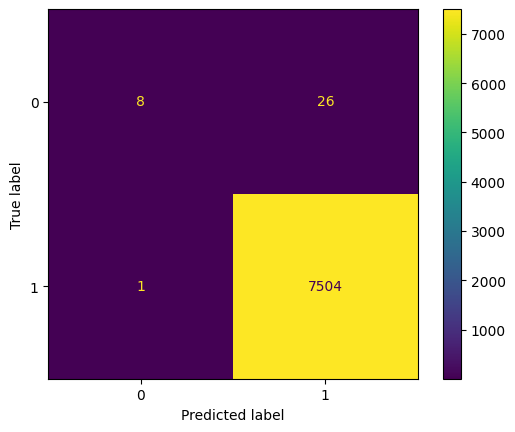

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=3)
sv1=SVC(kernel='rbf')
nb1=GaussianNB()
dt1=DecisionTreeClassifier(criterion='entropy',random_state=1)
rf1=RandomForestClassifier(criterion='entropy',random_state=1)
ab1=AdaBoostClassifier(random_state=1)
gb1=GradientBoostingClassifier(random_state=1)
xgb1=XGBClassifier()
models=[knn1,sv1,nb1,dt1,rf1,ab1,gb1,xgb1]
for model in models:
  print("************",model,"************")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print()

In [ ]:
df

,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,2,1,1,0,112500,4,4,1,1,1,0,0,16,2,59,4,0,30,1
1,1,0,1,0,270000,0,4,3,1,1,0,1,14,1,53,9,0,5,1
2,1,0,1,0,270000,0,4,3,1,1,0,1,14,1,53,9,0,5,1
3,1,0,1,0,270000,0,4,3,1,1,0,1,14,1,53,9,0,27,1
4,1,0,1,0,270000,0,4,3,1,1,0,1,14,1,53,9,0,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25123,1,1,1,1,157500,4,4,1,1,1,0,0,3,3,30,5,0,18,1
25124,1,1,1,1,157500,4,4,1,1,1,0,0,3,3,30,5,0,18,1
25125,1,1,1,1,157500,4,4,1,1,1,0,0,3,3,30,5,0,13,1
25126,1,1,1,1,157500,4,4,1,1,1,0,0,3,3,30,5,0,2,1


**Hyperparameter tuning**

In [ ]:
params_rf={'n_estimators':[100,110,120,130],
           'criterion':['gini','entropy','log_loss']}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(rf_os,params_rf,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 110, 120, 130]},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'criterion': 'entropy', 'n_estimators': 120}

In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.21      0.33        34
           1       1.00      1.00      1.00      7505

    accuracy                           1.00      7539
   macro avg       0.94      0.60      0.67      7539
weighted avg       1.00      1.00      1.00      7539



**dump the best model**

**Oversampled randomforest model has high accuracy of 98**

In [ ]:
X=df.iloc[:,:-1]
X

,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
0,2,1,1,0,112500,4,4,1,1,1,0,0,16,2,59,4,0,30
1,1,0,1,0,270000,0,4,3,1,1,0,1,14,1,53,9,0,5
2,1,0,1,0,270000,0,4,3,1,1,0,1,14,1,53,9,0,5
3,1,0,1,0,270000,0,4,3,1,1,0,1,14,1,53,9,0,27
4,1,0,1,0,270000,0,4,3,1,1,0,1,14,1,53,9,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25123,1,1,1,1,157500,4,4,1,1,1,0,0,3,3,30,5,0,18
25124,1,1,1,1,157500,4,4,1,1,1,0,0,3,3,30,5,0,18
25125,1,1,1,1,157500,4,4,1,1,1,0,0,3,3,30,5,0,13
25126,1,1,1,1,157500,4,4,1,1,1,0,0,3,3,30,5,0,2


In [ ]:
scaler.fit_transform(X)

array([[1.        , 1.        , 1.        , ..., 0.06976744, 0.        ,
        0.48333333],
       [0.5       , 0.        , 1.        , ..., 0.18604651, 0.        ,
        0.06666667],
       [0.5       , 0.        , 1.        , ..., 0.18604651, 0.        ,
        0.06666667],
       ...,
       [0.5       , 1.        , 1.        , ..., 0.09302326, 0.        ,
        0.2       ],
       [0.5       , 1.        , 1.        , ..., 0.09302326, 0.        ,
        0.01666667],
       [1.        , 1.        , 0.        , ..., 0.11627907, 0.        ,
        0.48333333]])

In [ ]:

pickle.dump(rf_os,open('rfodel.sav','wb'))

In [ ]:
pickle.dump(scaler,open('scaler.sav','wb'))

In [ ]:
y_new=rf_os.predict(scaler.transform([[0,1,0,0,0,4,4,1,1,1,0,0,16,2,59,4,20,0]]))
if y_new==0:
  print("no")
else:
  print("yes")

no
